In [108]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from mytest import model
import NPL
from Solve_NFXP import solve_NFXP
from estimate_NFXP import estimate as NFXP_estimate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
model = model()

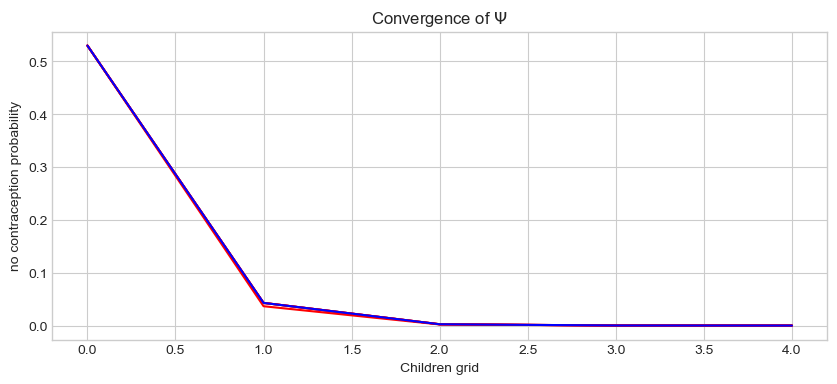

[[0.99       0.99       0.99       0.99       0.99      ]
 [0.47003595 0.9630682  0.99753575 0.99955639 0.99967107]
 [0.47003595 0.95677059 0.99715166 0.9994908  0.9996227 ]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0.95674901 0.99714973 0.99949046 0.99962244]
 [0.47003595 0

In [110]:
# SOLVE THE MODEL
pk_NPL = NPL.solve(model)

fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)

ax.set_title(f'Convergence of $\Psi$')
ax.set_xlabel('Children grid')
ax.set_ylabel('no contraception probability')
for i in range(4):
    ax.plot(model.grid,1-pk_NPL[i+1,:],color = 'red')
ax.plot(model.grid,1-pk_NPL[24,:],color = 'blue')
plt.show()

print(pk_NPL)

In [103]:
pk=np.array([0.47003595, 0.4758418,  0.4734607,  0.46330023,0.44991005, 0.43853143])

In [111]:
# Index 
T=25
N=25
idx = np.tile(np.arange(1,N+1),(T,1))  
t = np.tile(np.arange(1,T+1),(N,1)).T
            
        # Draw random numbers
        #u_init = np.random.randint(1,size=(1,N)) # initial condition
u_dx = np.random.rand(T,N) # mileage
u_d = np.random.rand(T,N) # choice
            
        # Find states and choices

x = np.zeros((T,N),dtype=int)
x1 =  np.zeros((T,N),dtype=int)
d = np.nan + np.zeros((T,N))
x[0,:] = np.zeros((1,N)) #u_init # initial condition
for it in range(T):
    d[it,:] = u_d[it,:]<pk[x[it,:]]  # no contraception = 1 , contracept = 0    
    # x[it,:] = np.minimum(x[it,:] + dx1[it,:] , n-1) # State transition, minimum to avoid exceeding the maximum mileage
    #   if it < T-1:
    #       x[it+1,:] = x1[it,:]

u_dxd = u_dx*d


csum_p = np.cumsum(model.p)
dx1 = 0
for val in csum_p:
    dx1 += u_dxd>val

for it in range(T):
    x1[it,:] = np.minimum((x[it,:] + dx1[it,:] ), model.n-1) # State transition, minimum to avoid exceeding the maximum mileage
    if it < T-1:
        x[it+1,:] = x1[it,:]
            
            
        # reshape 
idx =  np.reshape(idx,T*N,order='F')
t = np.reshape(t,T*N,order='F')
d = np.reshape(d,T*N,order='F')
x = np.reshape(x,T*N,order='F') + 1 # add 1 to make index start at 1 as in data - 1,2,...,n
x1 = np.reshape(x1,T*N,order='F') + 1 # add 1 to make index start at 1 as in data - 1,2,...,n
dx1 = np.reshape(dx1,T*N,order='F')


data = {'id': idx,'t': t, 'd': d, 'x': x, 'x1': x1, 'dx1': dx1}
df= pd.DataFrame(data)

In [112]:
 # ESTIMATE
# setup
Kmax=10  # Max number of outer loop iterations for NPL 
pnames = ['mu','eta']

# Load data

data = model.sim_data(50,50,pk)
data_class = NPL.setup_data(data)
samplesize = data_class.x.size

#Estimate using NPL
import time
t0 = time.time()
res, theta_hat,pk = NPL.estimate(model, data_class, Kmax)
t1 = time.time()


# Print the results
print(f'Structual estimation using busdata from Rust(1987)')
print(f'Beta        = {model.beta:.4f}')
print(f'n           = {model.n}')
print(f'Sample size = {samplesize}')

print('\n \nNPL \n--------------------------------')
print(f'Parameters     Estimates    s.e. ') 
print(f'{pnames[0]}             {theta_hat[0]:.4f}     ')
print(f'{pnames[1]}              {theta_hat[1]:.4f}      \n ')


print(f'Log-likelihood {-res.fun*samplesize:.4f}') 
print(f'runtime (seconds) {(t1-t0):.4f}')



Structual estimation using busdata from Rust(1987)
Beta        = 0.9999
n           = 5
Sample size = 2500

 
NPL 
--------------------------------
Parameters     Estimates    s.e. 
mu             0.0000     
eta              0.0000      
 
Log-likelihood -1732.8680
runtime (seconds) 0.0316


IndentationError: expected an indented block (2908551164.py, line 36)

In [79]:


N = 50
T = 25
pk = np.array([0.2, 0.1, 0.05, 0, 0])# np.ones(5)*0.5 # choice probability
n = 5
p = np.array([0.5, 0.5]) # conditional choice probability
np.random.seed(2020)
  
# Index 
idx = np.tile(np.arange(1,N+1),(T,1))  
t = np.tile(np.arange(1,T+1),(N,1)).T
        
# Draw random numbers
#u_init = np.random.randint(1,size=(1,N)) # initial condition
u_dx = np.random.rand(T,N) # mileage
u_d = np.random.rand(T,N) # choice
        
# Find states and choices

x = np.zeros((T,N),dtype=int)
x1 =  np.zeros((T,N),dtype=int)
d = np.nan + np.zeros((T,N))
x[0,:] = np.zeros((1,N)) #u_init # initial condition
for it in range(T):
    d[it,:] = u_d[it,:]<pk[x[it,:]]  # no contraception = 1 , contracept = 0    
   # x[it,:] = np.minimum(x[it,:] + dx1[it,:] , n-1) # State transition, minimum to avoid exceeding the maximum mileage
 #   if it < T-1:
 #       x[it+1,:] = x1[it,:]

u_dxd = u_dx*d


csum_p = np.cumsum(p)
dx1 = 0
for val in csum_p:
    dx1 += u_dxd>val

for it in range(T):
    x1[it,:] = np.minimum((x[it,:] + dx1[it,:] ), n-1) # State transition, minimum to avoid exceeding the maximum mileage
    if it < T-1:
         x[it+1,:] = x1[it,:]
        

        
# reshape 
idx =  np.reshape(idx,T*N,order='F')
t = np.reshape(t,T*N,order='F')
d = np.reshape(d,T*N,order='F')
x = np.reshape(x,T*N,order='F') + 1 # add 1 to make index start at 1 as in data - 1,2,...,n
x1 = np.reshape(x1,T*N,order='F') + 1 # add 1 to make index start at 1 as in data - 1,2,...,n
dx1 = np.reshape(dx1,T*N,order='F')


data = {'id': idx,'t': t, 'd': d, 'x': x, 'dx1': dx1, 'x1': x1}
df= pd.DataFrame(data) 

print(df)

      id   t    d  x  dx1  x1
0      1   1  1.0  1    1   2
1      1   2  1.0  2    1   3
2      1   3  0.0  3    0   3
3      1   4  0.0  3    0   3
4      1   5  1.0  3    0   3
...   ..  ..  ... ..  ...  ..
1245  50  21  1.0  2    1   3
1246  50  22  0.0  3    0   3
1247  50  23  0.0  3    0   3
1248  50  24  0.0  3    0   3
1249  50  25  0.0  3    0   3

[1250 rows x 6 columns]


In [80]:
dx1 = np.zeros((T,N))  # initialize dx1 as a zero array
for i in range(T):  # loop through each row of u_dx
    if d[i] == 0:  # check the value of d at the current row
        for j, val in enumerate(csum_p):  # loop through the probabilities in csum_p
            dx1[i] += u_dx[i] > val  # add 1 to dx1 where u_dx is greater than the current probability
    else:
        dx1[i] += 0  # if d is not zero, do not modify dx1